In [5]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)


In [12]:
# Filter dataset for Data Analyst jobs in the United States
df_DA_US = df[(df['job_title'] == 'Data Analyst') & 
              (df['job_country'] == 'United States')].copy()

# Extract month number from job_posted_date
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

# Explode job_skills so each skill gets its own row
df_DA_US_explode = df_DA_US.explode('job_skills')



In [15]:
# Create pivot table of monthly skill counts
df_DA_US_pivot = df_DA_US_explode.pivot_table(
    index='job_posted_month_no',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

# Add a "Total" row to sum each skill across all months
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

# Sort columns based on descending Total demand
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]



In [16]:
df_DA_US_pivot = df_DA_US_pivot[
    df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index
]

df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,colocation,yarn,hugging face,nuix,apl,nltk,mariadb,graphql,opencv,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,1,0,0,0,0,1,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,0,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,1,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,0,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,1,0,0,0,0,0,0,0,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,1,1,0,0,0,0,0


In [17]:
df_DA_US_pivot = df_DA_US_pivot.drop('Total')
df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,colocation,yarn,hugging face,nuix,apl,nltk,mariadb,graphql,opencv,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,1,0,0,0,0,1,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,0,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,1,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,0,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,1,0,0,0,0,0,0,0,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,1,1,0,0,0,0,0


Top 5 skills: ['sql', 'excel', 'tableau', 'python', 'power bi']


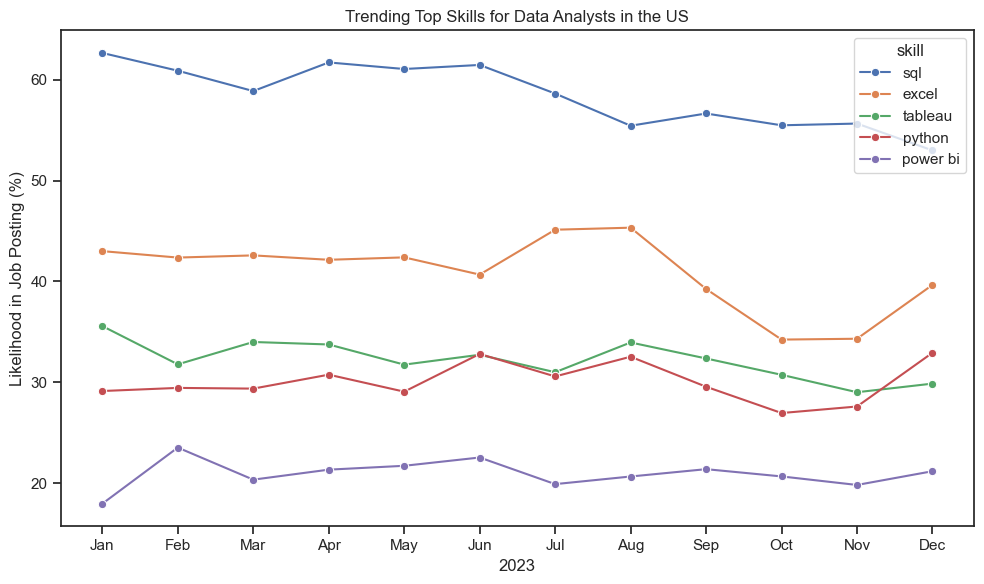

In [19]:
# 1. Total DA job postings per month (denominator for percentages)
monthly_job_counts = (
    df_DA_US['job_posted_month_no']
    .value_counts()
    .sort_index()
)

# 2. Pick the top 5 skills across the year
top_skills = (
    df_DA_US_pivot.sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)
print("Top 5 skills:", top_skills)

# 3. Convert counts -> percentage of DA job postings per month
df_DA_US_percent = (
    df_DA_US_pivot[top_skills]
    .div(monthly_job_counts, axis=0) * 100
)

# 4. Order by month and create a separate "month" column
df_DA_US_percent = df_DA_US_percent.sort_index()

df_DA_US_percent["month"] = (
    pd.to_datetime(df_DA_US_percent.index, format="%m")
      .month_name()
      .str[:3]          # Jan, Feb, ...
)

# 5. Long format for seaborn
df_trend = (
    df_DA_US_percent
      .reset_index(drop=True)          # keep month as a normal column
      .melt(
          id_vars="month",
          var_name="skill",
          value_name="likelihood"
      )
)

# 6. Ensure months are plotted in calendar order
month_order = ["Jan","Feb","Mar","Apr","May","Jun",
               "Jul","Aug","Sep","Oct","Nov","Dec"]
df_trend["month"] = pd.Categorical(df_trend["month"],
                                   categories=month_order,
                                   ordered=True)

# 7. Plot the trend lines
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df_trend,
    x="month",
    y="likelihood",
    hue="skill",
    marker="o"
)

plt.title("Trending Top Skills for Data Analysts in the US")
plt.xlabel("2023")
plt.ylabel("Likelihood in Job Posting (%)")
plt.tight_layout()
plt.show()
